In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from imblearn.over_sampling import SMOTE
from collections import Counter
from tqdm.notebook import tqdm

# for spliting data into train and test
from sklearn.model_selection import train_test_split, GridSearchCV

# load method
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# load model method
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier, AdaBoostRegressor, AdaBoostClassifier
from sklearn.svm import LinearSVR, SVR, LinearSVC, SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Load Data

In [2]:
wine_data = pd.read_csv("data/wine/winequality-red.csv", sep=";")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Data Visualization

## Quality Values Counting

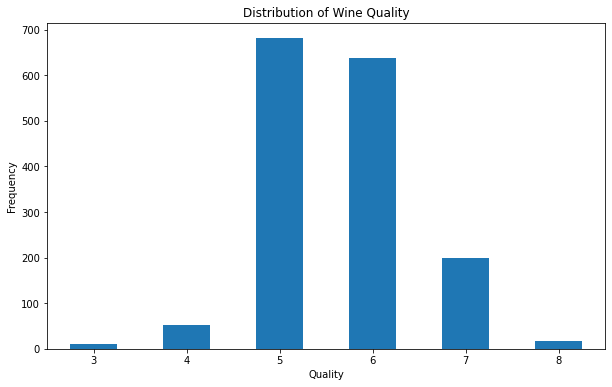

In [4]:
quality_counts = wine_data['quality'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
quality_counts.plot(kind='bar')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

## Correlation Heatmap

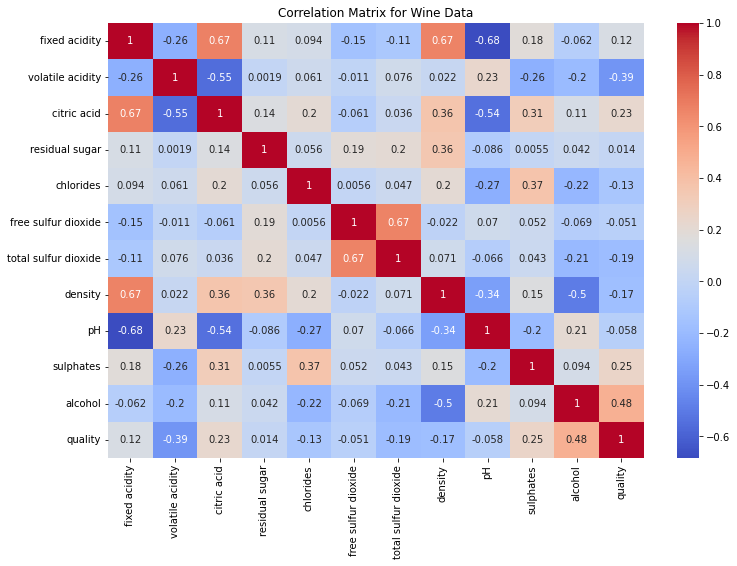

In [5]:
correlation_matrix = wine_data.corr()

# 상관관계 행렬을 이용한 히트맵 생성
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Wine Data')
plt.show()

# 1. Regression

## Split Data

In [6]:
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"============= train set =============\nX_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"============= test  set =============\nX_test:  {X_test.shape}, y_test:  {y_test.shape}\n=====================================")

============= train set =============
X_train: (1119, 11), y_train: (1119,)
============= test  set =============
X_test:  (480, 11), y_test:  (480,)


## SMOTE - Oversampling

In [7]:
print("Original dataset shape:", Counter(y_train))

Original dataset shape: Counter({5: 486, 6: 438, 7: 138, 4: 36, 8: 12, 3: 9})


In [8]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [9]:
print("Resampled dataset shape:", Counter(y_res))

Resampled dataset shape: Counter({7: 486, 5: 486, 6: 486, 3: 486, 8: 486, 4: 486})


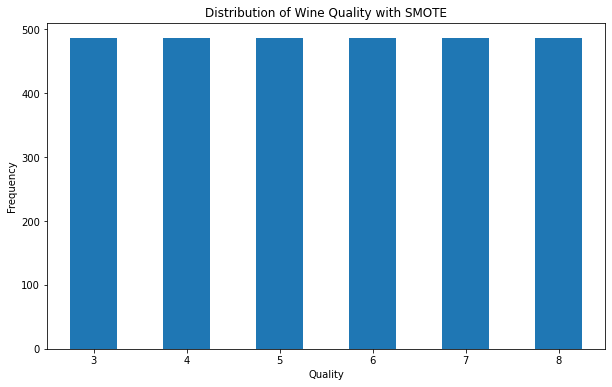

In [10]:
quality_counts = y_res.value_counts().sort_index()
plt.figure(figsize=(10, 6))
quality_counts.plot(kind='bar')
plt.title('Distribution of Wine Quality with SMOTE')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

## Train Models

### Linear Regression

In [11]:
# =================train model================
# train
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# predict
linear_y_train = model_linear.predict(X_train)
linear_y_test = model_linear.predict(X_test)
# ============================================

# ====================MSE=====================
linear_train_mse = mean_squared_error(y_train, linear_y_train)
linear_test_mse = mean_squared_error(y_test, linear_y_test)
# ============================================
print(f"MSE of Linear train : {round(linear_train_mse, 5)}")
print(f"MSE of Linear test  : {round(linear_test_mse, 5)}")

MSE of Linear train : 0.42079
MSE of Linear test  : 0.41123


#### Oversampled

In [12]:
# =================train model================
# train
model_linear = LinearRegression()
model_linear.fit(X_res, y_res)

# predict
linear_y_train = model_linear.predict(X_res)
linear_y_test = model_linear.predict(X_test)
# ============================================

# ====================MSE=====================
linear_train_mse = mean_squared_error(y_res, linear_y_train)
linear_test_mse = mean_squared_error(y_test, linear_y_test)
# ============================================
print(f"MSE of Linear train : {round(linear_train_mse, 5)}")
print(f"MSE of Linear test  : {round(linear_test_mse, 5)}")

MSE of Linear train : 0.82391
MSE of Linear test  : 0.80227


### Decision Tree

In [13]:
# =================train model================
# train
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

# predict
dt_y_train = dt.predict(X_train)
dt_y_test = dt.predict(X_test)

# ====================MSE=====================
dt_train_mse = mean_squared_error(y_train, dt_y_train)
dt_test_mse = mean_squared_error(y_test, dt_y_test)
# ============================================
print(f"MSE of Decision Tree train : {round(dt_train_mse, 5)}")
print(f"MSE of Decision Tree test  : {round(dt_test_mse, 5)}")

MSE of Decision Tree train : 0.0
MSE of Decision Tree test  : 0.64167


In [14]:
for t, p in zip(y_train[:10], dt_y_train[:10]):
    print(f"true: {t}\npred: {p}\n")

true: 7
pred: 7.0

true: 5
pred: 5.0

true: 5
pred: 5.0

true: 6
pred: 6.0

true: 5
pred: 5.0

true: 6
pred: 6.0

true: 7
pred: 7.0

true: 5
pred: 5.0

true: 5
pred: 5.0

true: 5
pred: 5.0



#### Oversampled

In [15]:
# =================train model================
# train
dt = DecisionTreeRegressor()
dt.fit(X_res, y_res)

# predict
dt_y_train = dt.predict(X_res)
dt_y_test = dt.predict(X_test)

# ====================MSE=====================
dt_train_mse = mean_squared_error(y_res, dt_y_train)
dt_test_mse = mean_squared_error(y_test, dt_y_test)
# ============================================
print(f"MSE of Decision Tree train : {round(dt_train_mse, 5)}")
print(f"MSE of Decision Tree test  : {round(dt_test_mse, 5)}")

MSE of Decision Tree train : 0.0
MSE of Decision Tree test  : 0.875


In [16]:
for t, p in zip(y_train[:10], dt_y_train[:10]):
    print(f"true: {t}\npred: {p}\n")

true: 7
pred: 7.0

true: 5
pred: 5.0

true: 5
pred: 5.0

true: 6
pred: 6.0

true: 5
pred: 5.0

true: 6
pred: 6.0

true: 7
pred: 7.0

true: 5
pred: 5.0

true: 5
pred: 5.0

true: 5
pred: 5.0



#### pruning

In [17]:
path = dt.cost_complexity_pruning_path(X_res, y_res)

ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = np.abs(ccp_alphas) # 부동 소수점에 의한 음수값 없애기 위한 작업

In [18]:
# alpha 마다의 cost_complexity 값 구한거!
regs = []
for ccp_alpha in ccp_alphas:
    reg_dt = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    reg_dt.fit(X_res, y_res)
    regs.append(reg_dt)
    
regs = regs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [reg.tree_.node_count for reg in regs]
depth = [reg.tree_.max_depth for reg in regs]

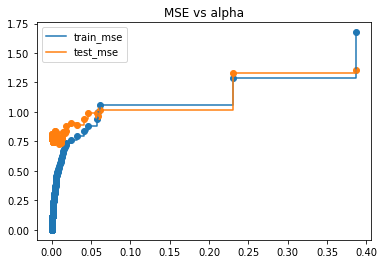

Best alpha: 0.00953


In [19]:
train_mse = []
test_mse = []
for reg in regs:
    y_train_pred = reg.predict(X_res)
    y_test_pred = reg.predict(X_test)
    train_mse.append(((y_res - y_train_pred)**2).mean())
    test_mse.append(((y_test - y_test_pred)**2).mean())

plt.scatter(ccp_alphas,train_mse)
plt.scatter(ccp_alphas,test_mse)
plt.plot(ccp_alphas,train_mse,label='train_mse',drawstyle="steps-post")
plt.plot(ccp_alphas,test_mse,label='test_mse',drawstyle="steps-post")
plt.legend()
plt.title('MSE vs alpha')
plt.show()

best_alpha = round(ccp_alphas[test_mse.index(min(test_mse))], 5)
print(f"Best alpha: {best_alpha}")

In [20]:
best_reg_dt = DecisionTreeRegressor(random_state=42, ccp_alpha=best_alpha)
best_reg_dt.fit(X_res, y_res)

reg_y_train = best_reg_dt.predict(X_res)
reg_y_test = best_reg_dt.predict(X_test)

best_reg_train_mse = ((y_res - reg_y_train)**2).mean()
best_reg_test_mse = ((y_test - reg_y_test)**2).mean()

print(f"MSE of the Best Regression Tree train : {round(best_reg_train_mse, 5)}")
print(f"MSE of the Best Regression Tree test  : {round(best_reg_test_mse, 5)}")

MSE of the Best Regression Tree train : 0.5259
MSE of the Best Regression Tree test  : 0.76844


### Random Forest

In [21]:
# =================train model================
# train
rf = RandomForestRegressor(random_state=42) # defalut n_estimators=100 / defalut max_features=1.0 /default max_depth=None
rf.fit(X_train, y_train)

# predict
rf_y_train = rf.predict(X_train)
rf_y_test = rf.predict(X_test)

# ====================MSE=====================
rf_train_mse = mean_squared_error(y_train, rf_y_train)
rf_test_mse = mean_squared_error(y_test, rf_y_test)
# ============================================
print(f"MSE of Random Forest train : {round(rf_train_mse, 5)}")
print(f"MSE of Random Forest test  : {round(rf_test_mse, 5)}")

MSE of Random Forest train : 0.04852
MSE of Random Forest test  : 0.34826


#### Oversampled

In [22]:
# =================train model================
# train
rf = RandomForestRegressor(random_state=42) # defalut n_estimators=100 / defalut max_features=1.0 /default max_depth=None
rf.fit(X_res, y_res)

# predict
rf_y_train = rf.predict(X_res)
rf_y_test = rf.predict(X_test)

# ====================MSE=====================
rf_train_mse = mean_squared_error(y_res, rf_y_train)
rf_test_mse = mean_squared_error(y_test, rf_y_test)
# ============================================
print(f"MSE of Random Forest train : {round(rf_train_mse, 5)}")
print(f"MSE of Random Forest test  : {round(rf_test_mse, 5)}")

MSE of Random Forest train : 0.02526
MSE of Random Forest test  : 0.42104


#### Hyper-parameter Tuning

In [23]:
# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None]
}

# 그리드 서치 객체 생성 및 학습
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=0)
grid_search.fit(X_res, y_res)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [24]:
# 최적의 하이퍼파라미터와 오류 확인
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 200}
Best CV Score: -0.5563648095438098


#### Best Models

In [25]:
# =================train model================
# train
rf = RandomForestRegressor(random_state=42, **grid_search.best_params_)
rf.fit(X_res, y_res)

# predict
rf_y_train = rf.predict(X_res)
rf_y_test = rf.predict(X_test)

# ====================MSE=====================
rf_train_mse = mean_squared_error(y_res, rf_y_train)
rf_test_mse = mean_squared_error(y_test, rf_y_test)
# ============================================
print(f"MSE of Random Forest train : {round(rf_train_mse, 5)}")
print(f"MSE of Random Forest test  : {round(rf_test_mse, 5)}")

MSE of Random Forest train : 0.02242
MSE of Random Forest test  : 0.366


### AdaBoosting

In [26]:
# =================train model================
# train
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)
ada.fit(X_train, y_train)

# predict
ada_y_train = ada.predict(X_train)
ada_y_test = ada.predict(X_test)

# ====================MSE=====================
ada_train_mse = mean_squared_error(y_train, ada_y_train)
ada_test_mse = mean_squared_error(y_test, ada_y_test)
# ============================================
print(f"MSE of AdaBoosting train : {round(ada_train_mse, 5)}")
print(f"MSE of AdaBoosting test  : {round(ada_test_mse, 5)}")

MSE of AdaBoosting train : 0.0
MSE of AdaBoosting test  : 0.38958


In [27]:
for t, p in zip(y_train[:10], ada_y_train[:10]):
    print(f"true: {t}\npred: {p}\n")

true: 7
pred: 7.0

true: 5
pred: 5.0

true: 5
pred: 5.0

true: 6
pred: 6.0

true: 5
pred: 5.0

true: 6
pred: 6.0

true: 7
pred: 7.0

true: 5
pred: 5.0

true: 5
pred: 5.0

true: 5
pred: 5.0



#### Oversampled

In [28]:
# =================train model================
# train
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)
ada.fit(X_res, y_res)

# predict
ada_y_train = ada.predict(X_res)
ada_y_test = ada.predict(X_test)

# ====================MSE=====================
ada_train_mse = mean_squared_error(y_res, ada_y_train)
ada_test_mse = mean_squared_error(y_test, ada_y_test)
# ============================================
print(f"MSE of AdaBoosting train : {round(ada_train_mse, 5)}")
print(f"MSE of AdaBoosting test  : {round(ada_test_mse, 5)}")

MSE of AdaBoosting train : 0.0
MSE of AdaBoosting test  : 0.45625


#### pruning

In [29]:
# =================train model================
# train
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=42, ccp_alpha=best_alpha), n_estimators=100, random_state=42)
ada.fit(X_res, y_res)

# predict
ada_y_train = ada.predict(X_res)
ada_y_test = ada.predict(X_test)

# ====================MSE=====================
ada_train_mse = mean_squared_error(y_res, ada_y_train)
ada_test_mse = mean_squared_error(y_test, ada_y_test)
# ============================================
print(f"MSE of AdaBoosting train : {round(ada_train_mse, 5)}")
print(f"MSE of AdaBoosting test  : {round(ada_test_mse, 5)}")

MSE of AdaBoosting train : 0.19438
MSE of AdaBoosting test  : 0.39214


### Gradient Boosting

In [30]:
# =================train model================
# train
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

# predict
gb_y_train = gb.predict(X_train)
gb_y_test = gb.predict(X_test)

# ====================MSE=====================
gb_train_mse = mean_squared_error(y_train, gb_y_train)
gb_test_mse = mean_squared_error(y_test, gb_y_test)
# ============================================
print(f"MSE of Gradient Boosting train : {round(gb_train_mse, 5)}")
print(f"MSE of Gradient Boosting test  : {round(gb_test_mse, 5)}")

MSE of Gradient Boosting train : 0.2214
MSE of Gradient Boosting test  : 0.38343


#### Oversampled

In [31]:
# =================train model================
# train
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_res, y_res)

# predict
gb_y_train = gb.predict(X_res)
gb_y_test = gb.predict(X_test)

# ====================MSE=====================
gb_train_mse = mean_squared_error(y_res, gb_y_train)
gb_test_mse = mean_squared_error(y_test, gb_y_test)
# ============================================
print(f"MSE of Gradient Boosting train : {round(gb_train_mse, 5)}")
print(f"MSE of Gradient Boosting test  : {round(gb_test_mse, 5)}")

MSE of Gradient Boosting train : 0.2834
MSE of Gradient Boosting test  : 0.57589


### Linear SVM Regressor

In [32]:
# =================train model================
# train
linear_svm = LinearSVR(random_state=42) # defalut C=1.0
linear_svm.fit(X_train, y_train)

# predict
linear_svm_y_train = linear_svm.predict(X_train)
linear_svm_y_test = linear_svm.predict(X_test)

# ====================MSE=====================
linear_svm_train_mse = mean_squared_error(y_train, linear_svm_y_train)
linear_svm_test_mse = mean_squared_error(y_test, linear_svm_y_test)
# ============================================
print(f"MSE of Linear SVM train : {round(linear_svm_train_mse, 5)}")
print(f"MSE of Linear SVM test  : {round(linear_svm_test_mse, 5)}")

MSE of Linear SVM train : 0.74479
MSE of Linear SVM test  : 0.69919


#### Oversampled

In [33]:
# =================train model================
# train
linear_svm = LinearSVR(random_state=42) # defalut C=1.0
linear_svm.fit(X_res, y_res)

# predict
linear_svm_y_train = linear_svm.predict(X_res)
linear_svm_y_test = linear_svm.predict(X_test)

# ====================MSE=====================
linear_svm_train_mse = mean_squared_error(y_res, linear_svm_y_train)
linear_svm_test_mse = mean_squared_error(y_test, linear_svm_y_test)
# ============================================
print(f"MSE of Linear SVM train : {round(linear_svm_train_mse, 5)}")
print(f"MSE of Linear SVM test  : {round(linear_svm_test_mse, 5)}")

MSE of Linear SVM train : 1.8696
MSE of Linear SVM test  : 2.03735


### Kernel SVM Regressor

In [34]:
# =================train model================
# train
kernel_svm = SVR() # defalut C=1.0 / default kernel=radial / default gamma='scale'
kernel_svm.fit(X_train, y_train)

# predict
kernel_svm_y_train = kernel_svm.predict(X_train)
kernel_svm_y_test = kernel_svm.predict(X_test)

# ====================MSE=====================
kernel_svm_train_mse = mean_squared_error(y_train, kernel_svm_y_train)
kernel_svm_test_mse = mean_squared_error(y_test, kernel_svm_y_test)
# ============================================
print(f"MSE of Kernel SVM train : {round(kernel_svm_train_mse, 5)}")
print(f"MSE of Kernel SVM test  : {round(kernel_svm_test_mse, 5)}")

MSE of Kernel SVM train : 0.54224
MSE of Kernel SVM test  : 0.52714


#### Oversampled

In [35]:
# =================train model================
# train
kernel_svm = SVR() # defalut C=1.0 / default kernel=radial / default gamma='scale' / default epsilon=0.1
kernel_svm.fit(X_res, y_res)

# predict
kernel_svm_y_train = kernel_svm.predict(X_res)
kernel_svm_y_test = kernel_svm.predict(X_test)

# ====================MSE=====================
kernel_svm_train_mse = mean_squared_error(y_res, kernel_svm_y_train)
kernel_svm_test_mse = mean_squared_error(y_test, kernel_svm_y_test)
# ============================================
print(f"MSE of Kernel SVM train : {round(kernel_svm_train_mse, 5)}")
print(f"MSE of Kernel SVM test  : {round(kernel_svm_test_mse, 5)}")

MSE of Kernel SVM train : 1.45267
MSE of Kernel SVM test  : 0.67366


#### Hyper-parameter Tuning

In [36]:
# 하이퍼파라미터 그리드 정의
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# 그리드 서치 객체 생성 및 학습
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=0)
grid_search.fit(X_res, y_res)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1, 10],
                         'gamma': ['scale', 'auto']},
             scoring='neg_mean_squared_error')

In [37]:
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'C': 10, 'epsilon': 0.1, 'gamma': 'auto'}
Best CV Score: -0.9688352141389555


#### Best Model

In [38]:
# =================train model================
# train
kernel_svm = SVR(**grid_search.best_params_) # defalut C=1.0 / default kernel=radial / default gamma='scale'
kernel_svm.fit(X_res, y_res)

# predict
kernel_svm_y_train = kernel_svm.predict(X_res)
kernel_svm_y_test = kernel_svm.predict(X_test)

# ====================MSE=====================
kernel_svm_train_mse = mean_squared_error(y_res, kernel_svm_y_train)
kernel_svm_test_mse = mean_squared_error(y_test, kernel_svm_y_test)
# ============================================
print(f"MSE of Kernel SVM train : {round(kernel_svm_train_mse, 5)}")
print(f"MSE of Kernel SVM test  : {round(kernel_svm_test_mse, 5)}")

MSE of Kernel SVM train : 0.08884
MSE of Kernel SVM test  : 0.80322


# 2. Classification

In [39]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


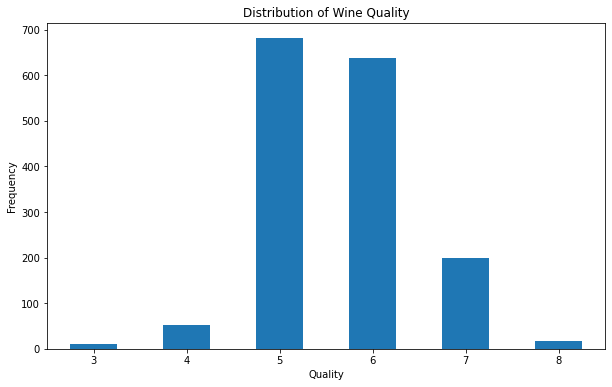

In [40]:
quality_counts = wine_data['quality'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
quality_counts.plot(kind='bar')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

## Create Label

In [41]:
wine_data['high_quality'] = wine_data['quality'].apply(lambda x: 1 if x>5.0 else 0)
wine_data[['quality', 'high_quality']]

,quality,high_quality
0,5,0
1,5,0
2,5,0
3,6,1
4,5,0
...,...,...
1594,5,0
1595,6,1
1596,6,1
1597,5,0


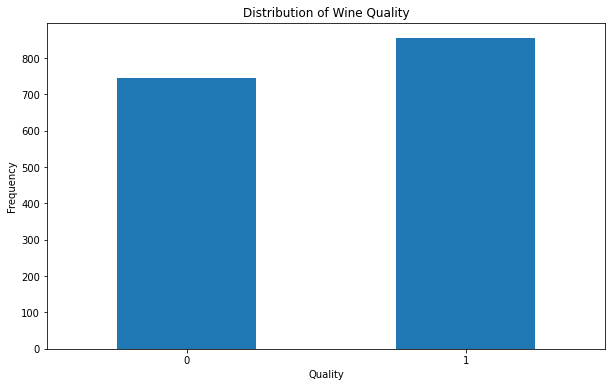

In [42]:
quality_counts = wine_data['high_quality'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
quality_counts.plot(kind='bar')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

## Split Data

In [43]:
X = wine_data.drop(['quality', 'high_quality'], axis=1)
y = wine_data['high_quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"============= train set =============\nX_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"============= test  set =============\nX_test:  {X_test.shape}, y_test:  {y_test.shape}\n=====================================")

============= train set =============
X_train: (1119, 11), y_train: (1119,)
============= test  set =============
X_test:  (480, 11), y_test:  (480,)


## Train Models

### Logistic Regression

In [44]:
# =================train model================
# train
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# predict
lr_y_train = lr_model.predict(X_train)
lr_y_test = lr_model.predict(X_test)
# ============================================

# ==================Accuracy==================
lr_train_acc = round(accuracy_score(y_train, lr_y_train)*100, 2)
lr_acc = round(accuracy_score(y_test, lr_y_test)*100, 2)
# ============================================
print(f"Accuracy of LR train : {lr_train_acc}")
print(f"Accuracy of LR test  : {lr_acc}")

Accuracy of LR train : 75.42
Accuracy of LR test  : 72.92


### LDA

In [45]:
# =================train model================
# train
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# predict
lda_y_train = lda_model.predict(X_train)
lda_y_test = lda_model.predict(X_test)
# ============================================

# ==================Accuracy==================
lda_train_acc = round(accuracy_score(y_train, lda_y_train)*100, 2)
lda_acc = round(accuracy_score(y_test, lda_y_test)*100, 2)
# ============================================
print(f"Accuracy of LDA train : {lda_train_acc}")
print(f"Accuracy of LDA test  : {lda_acc}")

Accuracy of LDA train : 76.14
Accuracy of LDA test  : 72.71


### QDA

In [46]:
# =================train model================
# train
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

# predict
qda_y_train = qda_model.predict(X_train)
qda_y_test = qda_model.predict(X_test)
# ============================================

# ==================Accuracy==================
qda_train_acc = round(accuracy_score(y_train, qda_y_train)*100, 2)
qda_acc = round(accuracy_score(y_test, qda_y_test)*100, 2)
# ============================================
print(f"Accuracy of QDA train : {qda_train_acc}")
print(f"Accuracy of QDA test  : {qda_acc}")

Accuracy of QDA train : 72.92
Accuracy of QDA test  : 72.29


### Naïve Bayes

In [47]:
# =================train model================
# train
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# predict
nb_y_train = nb_model.predict(X_train)
nb_y_test = nb_model.predict(X_test)
# ============================================

# ==================Accuracy==================
nb_train_acc = round(accuracy_score(y_train, nb_y_train)*100, 2)
nb_acc = round(accuracy_score(y_test, nb_y_test)*100, 2)
# ============================================
print(f"Accuracy of NB train : {nb_train_acc}")
print(f"Accuracy of NB test  : {nb_acc}")

Accuracy of NB train : 73.37
Accuracy of NB test  : 74.79


### Decision Tree

In [48]:
# =================train model================
# train
clf_dt = DecisionTreeClassifier(random_state=42) 
clf_dt.fit(X_train, y_train)

# predict
clf_y_train = clf_dt.predict(X_train)
clf_y_test = clf_dt.predict(X_test)
# ============================================

# ==================Accuracy==================
clf_train_acc = accuracy_score(y_train, clf_y_train)
clf_test_acc = accuracy_score(y_test, clf_y_test)
# ============================================
print(f"Accuracy of Classification Tree train : {round((clf_train_acc)*100, 2)}")
print(f"Accuracy of Classification Tree test  : {round((clf_test_acc)*100, 2)}")

Accuracy of Classification Tree train : 100.0
Accuracy of Classification Tree test  : 76.67


#### Visualization

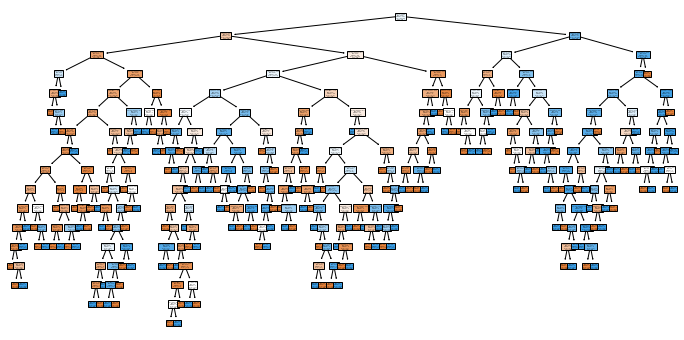

In [49]:
plt.figure(figsize=(12,6))
plot_tree(clf_dt, filled=True, feature_names=X_train.columns, class_names=["high", "low"])
plt.show()

#### pruning

In [50]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = np.abs(ccp_alphas) # 부동 소수점에 의한 음수값 없애기 위한 작업

In [51]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clfs.append(clf_dt)
    
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [reg.tree_.max_depth for clf in clfs]

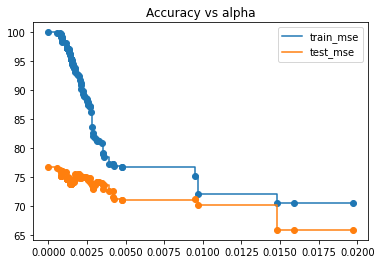

Best alpha: 0.01482


In [52]:
train_acc = []
test_acc = []
for clf in clfs:
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    train_acc.append(round((accuracy_score(y_train, y_train_pred)*100), 2))
    test_acc.append(round((accuracy_score(y_test, y_test_pred)*100), 2))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_mse',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_mse',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

best_alpha = round(ccp_alphas[test_acc.index(min(test_acc))], 5)
print(f"Best alpha: {best_alpha}")

#### Best Model

In [53]:
best_clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
best_clf_dt.fit(X_train, y_train)

clf_y_train = best_clf_dt.predict(X_train)
clf_y_test = best_clf_dt.predict(X_test)

best_clf_train_acc = accuracy_score(y_train, clf_y_train)
best_clf_test_acc = accuracy_score(y_test, clf_y_test)

print(f"Accuracy of the Best Regression Tree train : {round((best_clf_train_acc)*100, 5)}")
print(f"Accuracy of the Best Regression Tree test  : {round((best_clf_test_acc)*100, 5)}")

Accuracy of the Best Regression Tree train : 72.0286
Accuracy of the Best Regression Tree test  : 70.20833


#### Visualization

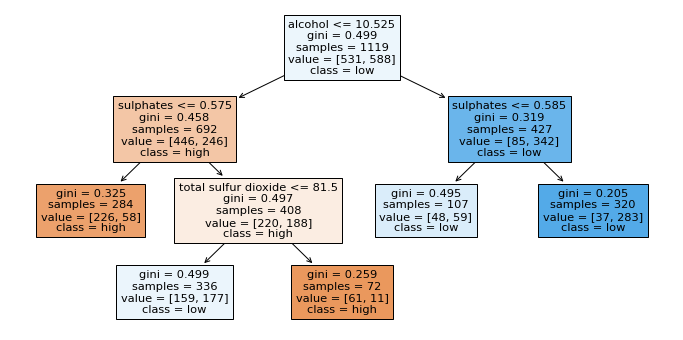

In [54]:
plt.figure(figsize=(12,6))
plot_tree(best_clf_dt,feature_names=X_train.columns,class_names=["high", "low"],filled=True)
plt.show()

### Random Forest

In [55]:
# =================train model================
# train
clf_rf = RandomForestClassifier(random_state=42) 
clf_rf.fit(X_train, y_train)

# predict
clf_y_train = clf_rf.predict(X_train)
clf_y_test = clf_rf.predict(X_test)
# ============================================

# ==================Accuracy==================
clf_train_acc = accuracy_score(y_train, clf_y_train)
clf_test_acc = accuracy_score(y_test, clf_y_test)
# ============================================
print(f"Accuracy of Classification Tree train : {round((clf_train_acc)*100, 2)}")
print(f"Accuracy of Classification Tree test  : {round((clf_test_acc)*100, 2)}")

Accuracy of Classification Tree train : 100.0
Accuracy of Classification Tree test  : 80.21


#### Hyper-parameter Tuning

In [56]:
# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None]
}

# 그리드 서치 객체 생성 및 학습
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [57]:
# 최적의 하이퍼파라미터와 오류 확인
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'max_features': 'auto', 'n_estimators': 300}
Best CV Score: -0.1929732543241512


#### Best Model

In [58]:
# =================train model================
# train
best_clf_rf = RandomForestClassifier(random_state=42, **grid_search.best_params_) 
best_clf_rf.fit(X_train, y_train)

# predict
clf_y_train = best_clf_rf.predict(X_train)
clf_y_test = best_clf_rf.predict(X_test)
# ============================================

# ==================Accuracy==================
clf_train_acc = accuracy_score(y_train, clf_y_train)
clf_test_acc = accuracy_score(y_test, clf_y_test)
# ============================================
print(f"Accuracy of Classification Tree train : {round((clf_train_acc)*100, 2)}")
print(f"Accuracy of Classification Tree test  : {round((clf_test_acc)*100, 2)}")

Accuracy of Classification Tree train : 100.0
Accuracy of Classification Tree test  : 80.21


### AdaBoosting

In [59]:
# =================train model================
# train
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
ada.fit(X_train, y_train)

# predict
ada_y_train = ada.predict(X_train)
ada_y_test = ada.predict(X_test)

# ==================Accuracy==================
ada_train_acc = accuracy_score(y_train, ada_y_train)
ada_test_acc = accuracy_score(y_test, ada_y_test)
# ============================================
print(f"Accuracy of AdaBoosting train : {round((ada_train_acc)*100, 2)}")
print(f"Accuracy of AdaBoosting test  : {round((ada_test_acc)*100, 2)}")

Accuracy of AdaBoosting train : 100.0
Accuracy of AdaBoosting test  : 76.25


#### pruning

In [60]:
# =================train model================
# train
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha), n_estimators=100, random_state=42)
ada.fit(X_train, y_train)

# predict
ada_y_train = ada.predict(X_train)
ada_y_test = ada.predict(X_test)

#==================Accuracy==================
ada_train_acc = accuracy_score(y_train, ada_y_train)
ada_test_acc = accuracy_score(y_test, ada_y_test)
# ============================================
print(f"Accuracy of AdaBoosting train : {round((ada_train_acc)*100, 2)}")
print(f"Accuracy of AdaBoosting test  : {round((ada_test_acc)*100, 2)}")

Accuracy of AdaBoosting train : 76.32
Accuracy of AdaBoosting test  : 71.04


### Gradient Boosting

In [61]:
# =================train model================
# train
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# predict
gb_y_train = gb.predict(X_train)
gb_y_test = gb.predict(X_test)

# ==================Accuracy==================
gb_train_acc = accuracy_score(y_train, gb_y_train)
gb_test_acc = accuracy_score(y_test, gb_y_test)
# ============================================
print(f"Accuracy of Gradient Boosting train : {round((gb_train_acc)*100, 2)}")
print(f"Accuracy of Gradient Boosting test  : {round((gb_test_acc)*100, 2)}")

Accuracy of Gradient Boosting train : 87.85
Accuracy of Gradient Boosting test  : 77.71


### Linear SVM Classifier

In [62]:
# =================train model================
# train
linear_svm = LinearSVC(random_state=42) # defalut C=1.0
linear_svm.fit(X_train, y_train)

# predict
linear_svm_y_train = linear_svm.predict(X_train)
linear_svm_y_test = linear_svm.predict(X_test)

# ==================Accuracy==================
linear_svm_train_acc = accuracy_score(y_train, linear_svm_y_train)
linear_svm_test_acc = accuracy_score(y_test, linear_svm_y_test)
# ============================================
print(f"Accuracy of Linear SVM train : {round((linear_svm_train_acc)*100, 2)}")
print(f"Accuracy of Linear SVM test  : {round((linear_svm_test_acc)*100, 2)}")

Accuracy of Linear SVM train : 65.77
Accuracy of Linear SVM test  : 61.88


### Kernel SVM Regressor

In [63]:
# =================train model================
# train
kernel_svm = SVC() # defalut C=1.0 / default kernel=radial / default gamma='scale'
kernel_svm.fit(X_train, y_train)

# predict
kernel_svm_y_train = kernel_svm.predict(X_train)
kernel_svm_y_test = kernel_svm.predict(X_test)

# ==================Accuracy==================
kernel_svm_train_acc = accuracy_score(y_train, kernel_svm_y_train)
kernel_svm_test_acc = accuracy_score(y_test, kernel_svm_y_test)
# ============================================
print(f"Accuracy of Kernel SVM train : {round((kernel_svm_train_acc)*100, 2)}")
print(f"Accuracy of Kernel SVM test  : {round((kernel_svm_test_acc)*100, 2)}")

Accuracy of Kernel SVM train : 63.45
Accuracy of Kernel SVM test  : 64.58


#### Hyper-parameter Tuning

In [64]:
# 하이퍼파라미터 그리드 정의
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# 그리드 서치 객체 생성 및 학습
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']},
             scoring='neg_mean_squared_error')

In [65]:
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'C': 10, 'gamma': 'scale'}
Best CV Score: -0.29307335041639976


#### Best Model

In [66]:
# =================train model================
# train
kernel_svm = SVC(**grid_search.best_params_) # defalut C=1.0 / default kernel=radial / default gamma='scale'
kernel_svm.fit(X_train, y_train)

# predict
kernel_svm_y_train = kernel_svm.predict(X_train)
kernel_svm_y_test = kernel_svm.predict(X_test)

# ==================Accuracy==================
kernel_svm_train_acc = accuracy_score(y_train, kernel_svm_y_train)
kernel_svm_test_acc = accuracy_score(y_test, kernel_svm_y_test)
# ============================================
print(f"Accuracy of Kernel SVM train : {round((kernel_svm_train_acc)*100, 2)}")
print(f"Accuracy of Kernel SVM test  : {round((kernel_svm_test_acc)*100, 2)}")

Accuracy of Kernel SVM train : 72.83
Accuracy of Kernel SVM test  : 69.17
